In [1]:
import numpy as np
import pandas as pd
from datetime import datetime


import requests
import time
import json
import ast

from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from scipy.stats import gaussian_kde
from scipy.spatial.distance import euclidean

import warnings

# FutureWarning 무시 설정
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# 로그에따라 아이템 값 이름이 달라서 통일시켜주어야 한다.

mapping = {
    'Item_Weapon_M16A4_C': 'WeapM16A4_C',
    'Item_Weapon_HK416_C': 'WeapHK416_C',
    'Item_Weapon_AK47_C': 'WeapAK47_C',
    'Item_Weapon_SCAR-L_C': 'WeapSCAR-L_C',
    'Item_Weapon_G36C_C': 'WeapG36C_C',  # Not present in the second list
    'Item_Weapon_BerylM762_C': 'WeapBerylM762_C',
    'Item_Weapon_QBZ95_C': 'WeapQBZ95_C',
    'Item_Weapon_Mk47Mutant_C': 'WeapMk47Mutant_C',
    'Item_Weapon_AUG_C': 'WeapAUG_C',
    'Item_Weapon_Groza_C': 'WeapGroza_C',
    'Item_Weapon_ACE32_C': 'WeapACE32_C',
    'Item_Weapon_FAMASG2_C': 'WeapFamasG2_C',
    'Item_Weapon_K2_C': 'WeapK2_C',
    'Item_Weapon_Mini14_C': 'WeapMini14_C',
    'Item_Weapon_SKS_C': 'WeapSKS_C',
    'Item_Weapon_Mk14_C': 'WeapMk14_C',
    'Item_Weapon_Mk12_C': 'WeapMk12_C',
    'Item_Weapon_SLR_C': 'WeapSLR_C',  # Not present in the second list
    'Item_Weapon_QBU88_C': 'WeapQBU88_C',
    'Item_Weapon_VSS_C': 'WeapVSS_C',
    'Item_Weapon_Dragunov_C': 'WeapDragunov_C',
    'Item_Weapon_FNFal_C': 'WeapFNFal_C',
    'Item_Weapon_UZI_C': 'WeapUZI_C',
    'Item_Weapon_Vector_C': 'WeapVector_C',
    'Item_Weapon_UMP_C': 'WeapUMP_C',
    'Item_Weapon_TommyGun_C': 'WeapTommyGun_C',  # Not present in the second list
    'Item_Weapon_Thompson_C': 'WeapThompson_C',
    'Item_Weapon_Thompson_Old_C': 'WeapThompson_old_C',
    'Item_Weapon_PP19Bizon_C': 'WeapPP19Bizon_C',  # Not present in the second list
    'Item_Weapon_MP5K_C': 'WeapMP5K_C',  # Not present in the second list
    'Item_Weapon_P90_C': 'WeapP90_C',
    'Item_Weapon_JS9_C': 'WeapJS9_C',
    'Item_Weapon_BizonPP19_C': 'WeapBizonPP19_C',
    'Item_Weapon_vz61Skorpion_C': 'Weapvz61Skorpion_C',
    'Item_Weapon_S686_C': 'WeapS686_C',  # Not present in the second list
    'Item_Weapon_S1897_C': 'WeapS1897_C',  # Not present in the second list
    'Item_Weapon_S12K_C': 'WeapS12K_C',  # Not present in the second list
    'Item_Weapon_DP12_C': 'WeapDP12_C',
    'Item_Weapon_SawedOff_C': 'WeapSawnoff_C',
    'Item_Weapon_Saiga12_C': 'WeapSaiga12_C',
    'Item_Weapon_Berreta686_C': 'WeapBerreta686_C',
    'Item_Weapon_AWM_C': 'WeapAWM_C',
    'Item_Weapon_M24_C': 'WeapM24_C',
    'Item_Weapon_Kar98k_C': 'WeapKar98k_C',
    'Item_Weapon_Win94_C': 'WeapWinchester_C',
    'Item_Weapon_MosinNagant_C': 'WeapMosinNagant_C',
    'Item_Weapon_LynxAMR_C': 'WeapLynxAMR_C',  # Not present in the second list
    'Item_Weapon_Winchester_C': 'WeapWinchester_C',
    'Item_Weapon_Mosin_C': 'WeapMosin_C',
    'Item_Weapon_Mortar_C': 'WeapMortar_C',  # Not present in the second list
    'Item_Weapon_PanzerFaust100M_C': 'WeapPanzerFaust100M_C',  # Not present in the second list
    'Item_Weapon_Crossbow_C': 'WeapCrossbow_1_C',
    'Item_Weapon_M249_C': 'WeapM249_C',
    'Item_Weapon_DP28_C': 'WeapDP28_C',
    'Item_Weapon_MG3_C': 'WeapMG3_C',
    'Item_Weapon_G18_C': 'WeapG18_C',
    'Item_Weapon_M1911_C': 'WeapM1911_C',
    'Item_Weapon_M9_C': 'WeapM9_C',
    'Item_Weapon_Rhino_C': 'WeapRhino_C',
    'Item_Weapon_NagantM1895_C': 'WeapNagantM1895_C',
    'Item_Weapon_Deagle_C': 'WeapDeagle_C',  # Not present in the second list
    'Item_Weapon_Pan_C': 'WeapPan_C',
    'Item_Weapon_Sickle_C': 'WeapSickle_C',  # Not present in the second list
    'Item_Weapon_Machete_C': 'WeapMachete_C',  # Not present in the second list
    'Item_Weapon_Crowbar_C': 'WeapCrowbar_C',  # Not present in the second list
    'Item_Weapon_Grenade_C': 'WeapGrenade_C',  # Not present in the second list
    'Item_Weapon_Molotov_Cocktail_C': 'WeapMolotov_Cocktail_C',  # Not present in the second list
    'Item_Weapon_SmokeBomb_C': 'WeapSmokeBomb_C',  # Not present in the second list
    'Item_Weapon_StickyGrenade_C': 'WeapStickyGrenade_C',  # Not present in the second list
    'Item_Weapon_StunGrenade_C': 'WeapStunGrenade_C'  # Not present in the second list
}


item_mapping = {   # Helmets
    'Item_Head_F_01_Lv1_C': 'Helmet_Lv1',
    'Item_Head_F_02_Lv1_C': 'Helmet_Lv1',
    'Item_Head_G_01_Lv2_C': 'Helmet_Lv2',
    'Item_Head_G_02_Lv2_C': 'Helmet_Lv2',
    'Item_Head_H_01_Lv3_C': 'Helmet_Lv3',
    'Item_Head_H_02_Lv3_C': 'Helmet_Lv3',

    # Vests
    'Item_Armor_E_01_Lv1_C': 'Vest_Lv1',
    'Item_Armor_E_02_Lv1_C': 'Vest_Lv1',
    'Item_Armor_F_01_Lv2_C': 'Vest_Lv2',
    'Item_Armor_F_02_Lv2_C': 'Vest_Lv2',
    'Item_Armor_G_01_Lv3_C': 'Vest_Lv3',
    'Item_Armor_G_02_Lv3_C': 'Vest_Lv3',

    # Backpacks
    'Item_Back_E_01_Lv1_C': 'Backpack_Lv1',
    'Item_Back_E_02_Lv1_C': 'Backpack_Lv1',
    'Item_Back_F_01_Lv2_C': 'Backpack_Lv2',
    'Item_Back_F_02_Lv2_C': 'Backpack_Lv2',
    'Item_Back_G_01_Lv3_C': 'Backpack_Lv3',
    'Item_Back_G_02_Lv3_C': 'Backpack_Lv3',

    # Meds and Boosts
    'Item_Heal_Bandage_C': 'Bandage',
    'Item_Heal_FirstAid_C': 'FirstAidKit',
    'Item_Heal_MedKit_C': 'MedKit',
    'Item_Boost_EnergyDrink_C': 'EnergyDrink',
    'Item_Boost_PainKiller_C': 'Painkiller',
    'Item_Boost_AdrenalineSyringe_C': 'AdrenalineSyringe',

    # Throwables
    'Item_Weapon_Grenade_C': 'FragGrenade',
    'Item_Weapon_Molotov_C': 'MolotovCocktail',
    'Item_Weapon_SmokeBomb_C': 'SmokeGrenade',
    'Item_Weapon_FlashBang_C': 'FlashBang',

    # Melee Weapons
    'Item_Weapon_Pan_C': 'Pan',
}



# 총기 부착물 attach 아이템 변수명 맵핑

attach_mapping = {
    # Upper 주로 조준경
    'Item_Attach_Weapon_Upper_Scope6x_C': 'Scope6x',
    'Item_Attach_Weapon_Upper_Thermal_C': 'Thermal',
    'Item_Attach_Weapon_Upper_Scope3x_C': 'Scope3x',
    'Item_Attach_Weapon_Upper_CQBSS_C': 'CQBSS',
    'Item_Attach_Weapon_Upper_DotSight_01_C': 'DotSight_01',
    'Item_Attach_Weapon_Upper_ACOG_01_C': 'ACOG_01',
    'Item_Attach_Weapon_Upper_PM2_01_C': 'PM2_01',
    'Item_Attach_Weapon_Upper_Holosight_C': 'Holosight',
    'Item_Attach_Weapon_Upper_Aimpoint_C': 'Aimpoint',

    # Muzzle 총구 부분, 소음기, 소염기 등
    'Item_Attach_Weapon_Muzzle_FlashHider_Medium_C': 'FlashHider_Medium',
    'Item_Attach_Weapon_Muzzle_Suppressor_SniperRifle_C': 'Suppressor_SniperRifle',
    'Item_Attach_Weapon_Muzzle_Duckbill_C': 'Duckbill',
    'Item_Attach_Weapon_Muzzle_FlashHider_Large_C': 'FlashHider_Large',
    'Item_Attach_Weapon_Muzzle_Compensator_Medium_C': 'Compensator_Medium',
    'Item_Attach_Weapon_Muzzle_Compensator_SniperRifle_C': 'Compensator_SniperRifle',
    'Item_Attach_Weapon_Muzzle_FlashHider_SniperRifle_C': 'FlashHider_SniperRifle',
    'Item_Attach_Weapon_Muzzle_Choke_C': 'Choke',
    'Item_Attach_Weapon_Muzzle_Compensator_Large_C': 'Compensator_Large',
    'Item_Attach_Weapon_Muzzle_Suppressor_Large_C': 'Suppressor_Large',
    'Item_Attach_Weapon_Muzzle_Suppressor_Medium_C': 'Suppressor_Medium',

    # Magazine 총기의 탄창, 퀵드로우, 대용량 탄창등
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_SniperRifle_C': 'ExtendedQuickDraw_SniperRifle',
    'Item_Attach_Weapon_Magazine_Extended_Medium_C': 'Extended_Medium',
    'Item_Attach_Weapon_Magazine_QuickDraw_Medium_C': 'QuickDraw_Medium',
    'Item_Attach_Weapon_Magazine_Extended_Large_C': 'Extended_Large',
    'Item_Attach_Weapon_Magazine_Extended_SniperRifle_C': 'Extended_SniperRifle',
    'Item_Attach_Weapon_Magazine_QuickDraw_Large_C': 'QuickDraw_Large',
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_Medium_C': 'ExtendedQuickDraw_Medium',
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_Large_C': 'ExtendedQuickDraw_Large',


    # SideRail ? 총기의 측면 부착물
    'Item_Attach_Weapon_SideRail_DotSight_RMR_C': 'DotSight_RMR',
    'Item_Attach_Weapon_Stock_SniperRifle_CheekPad_C': 'CheekPad_SniperRifle',
    'Item_Attach_Weapon_Stock_SniperRifle_BulletLoops_C': 'BulletLoops_SniperRifle',
    'Item_Attach_Weapon_Stock_UZI_C': 'UZI_Stock',

    # Lower 손잡이나 그립
    'Item_Attach_Weapon_Lower_ThumbGrip_C': 'ThumbGrip',
    'Item_Attach_Weapon_Lower_Foregrip_C': 'Foregrip',
    'Item_Attach_Weapon_Lower_HalfGrip_C': 'HalfGrip',
    'Item_Attach_Weapon_Lower_AngledForeGrip_C': 'AngledForeGrip',
    'Item_Attach_Weapon_Lower_LightweightForeGrip_C': 'LightweightForeGrip',
    'Item_Attach_Weapon_Lower_LaserPointer_C': 'LaserPointer',

    # Stock 총기 개머리판 ,패드?
    'Item_Attach_Weapon_Stock_AR_HeavyStock_C': 'AR_HeavyStock',
    'Item_Attach_Weapon_Stock_AR_Composite_C': 'AR_Composite',

    }

Upper = ['Scope6x', 'Thermal', 'Scope3x', 'CQBSS', 'DotSight_01', 'ACOG_01', 'PM2_01', 'Holosight', 'Aimpoint']

Muzzle= ['FlashHider_Medium', 'Suppressor_SniperRifle', 'Duckbill', 'FlashHider_Large', 'Compensator_Medium',
            'Compensator_SniperRifle', 'FlashHider_SniperRifle', 'Choke', 'Compensator_Large', 'Suppressor_Large',
            'Suppressor_Medium']

Magazine = ['ExtendedQuickDraw_SniperRifle', 'Extended_Medium', 'QuickDraw_Medium', 'Extended_Large',
              'Extended_SniperRifle', 'QuickDraw_Large', 'ExtendedQuickDraw_Medium', 'ExtendedQuickDraw_Large']

SideRail = ['DotSight_RMR', 'CheekPad_SniperRifle', 'BulletLoops_SniperRifle', 'UZI_Stock']


Lower = ['ThumbGrip', 'Foregrip', 'HalfGrip', 'AngledForeGrip', 'LightweightForeGrip', 'LaserPointer']

Stock = ['AR_HeavyStock', 'AR_Composite']


# 무기 장르 목록
AR = [
    'Item_Weapon_M16A4_C', 'Item_Weapon_HK416_C', 'Item_Weapon_AK47_C',
    'Item_Weapon_SCAR-L_C', 'Item_Weapon_G36C_C', 'Item_Weapon_BerylM762_C', 'Item_Weapon_QBZ95_C', 'Item_Weapon_Mk47Mutant_C',
    'Item_Weapon_AUG_C', 'Item_Weapon_Groza_C', 'Item_Weapon_ACE32_C', 'Item_Weapon_FAMASG2_C', 'Item_Weapon_K2_C',
    'WeapM16A4_C', 'WeapHK416_C', 'WeapAK47_C', 'WeapSCAR-L_C', 'WeapG36C_C', 'WeapBerylM762_C', 'WeapQBZ95_C', 'WeapMk47Mutant_C',
    'WeapAUG_C', 'WeapGroza_C', 'WeapACE32_C', 'WeapFamasG2_C', 'WeapK2_C'
]

DMR = [
    'Item_Weapon_Mini14_C', 'Item_Weapon_SKS_C', 'Item_Weapon_Mk14_C', 'Item_Weapon_Mk12_C', 'Item_Weapon_SLR_C',
    'Item_Weapon_QBU88_C', 'Item_Weapon_VSS_C', 'Item_Weapon_Dragunov_C', 'Item_Weapon_FNFal_C',
    'WeapMini14_C', 'WeapSKS_C', 'WeapMk14_C', 'WeapMk12_C', 'WeapSLR_C', 'WeapQBU88_C', 'WeapVSS_C', 'WeapDragunov_C', 'WeapFNFal_C'
]

SMG = [
    'Item_Weapon_UZI_C', 'Item_Weapon_Vector_C', 'Item_Weapon_UMP_C', 'Item_Weapon_TommyGun_C', 'Item_Weapon_Thompson_C', 'Item_Weapon_Thompson_Old_C',
    'Item_Weapon_PP19Bizon_C', 'Item_Weapon_MP5K_C', 'Item_Weapon_P90_C', 'Item_Weapon_JS9_C', 'Item_Weapon_BizonPP19_C',
    'WeapUZI_C', 'WeapVector_C', 'WeapUMP_C', 'WeapTommyGun_C', 'WeapThompson_C', 'WeapThompson_old_C', 'WeapPP19Bizon_C', 'WeapMP5K_C', 'WeapP90_C', 'WeapJS9_C', 'WeapBizonPP19_C', 'Weapvz61Skorpion_C'
]

SG = [
    'Item_Weapon_S686_C', 'Item_Weapon_S1897_C', 'Item_Weapon_S12K_C', 'Item_Weapon_DP12_C', 'Item_Weapon_SawedOff_C', 'Item_Weapon_Saiga12_C', 'Item_Weapon_Berreta686_C',
    'WeapS686_C', 'WeapS1897_C', 'WeapS12K_C', 'WeapDP12_C', 'WeapSawnoff_C', 'WeapSaiga12_C', 'WeapBerreta686_C'
]

SR = [
    'Item_Weapon_AWM_C', 'Item_Weapon_M24_C', 'Item_Weapon_Kar98k_C', 'Item_Weapon_Win94_C', 'Item_Weapon_MosinNagant_C', 'Item_Weapon_LynxAMR_C', 'Item_Weapon_Winchester_C', 'Item_Weapon_Mosin_C',
    'WeapAWM_C', 'WeapM24_C', 'WeapKar98k_C', 'WeapWinchester_C', 'WeapMosinNagant_C', 'WeapLynxAMR_C', 'WeapWinchester_C', 'WeapMosin_C'
]

Special = [
    'Item_Weapon_FlareGun_C', 'Item_Weapon_Mortar_C', 'Item_Weapon_PanzerFaust100M_C', 'Item_Weapon_Ziplinegun_C', 'Item_Weapon_Crossbow_C',
    'WeapMortar_C', 'WeapPanzerFaust100M_C', 'WeapCrossbow_1_C'
]

LMG = [
    'Item_Weapon_M249_C', 'Item_Weapon_DP28_C', 'Item_Weapon_MG3_C',
    'WeapM249_C', 'WeapDP28_C', 'WeapMG3_C'
]

P = [
    'Item_Weapon_G18_C', 'Item_Weapon_M1911_C', 'Item_Weapon_M9_C', 'Item_Weapon_Rhino_C', 'Item_Weapon_NagantM1895_C', 'Item_Weapon_Deagle_C',
    'WeapG18_C', 'WeapM1911_C', 'WeapM9_C', 'WeapRhino_C', 'WeapNagantM1895_C', 'WeapDeagle_C','Item_Weapon_vz61Skorpion_C'
]

Melee = [
    'Item_Weapon_Pan_C', 'Item_Weapon_Sickle_C', 'Item_Weapon_Machete_C', 'Item_Weapon_Crowbar_C',
    'WeapPan_C', 'WeapSickle_C', 'WeapMachete_C', 'WeapCrowbar_C'
]

Throwables = [
    'Item_Weapon_Grenade_C', 'Item_Weapon_Molotov_Cocktail_C', 'Item_Weapon_SmokeBomb_C', 'Item_Weapon_StickyGrenade_C', 'Item_Weapon_StunGrenade_C',
    'WeapGrenade_C', 'WeapMolotov_Cocktail_C', 'WeapSmokeBomb_C', 'WeapStickyGrenade_C', 'WeapStunGrenade_C'
]


In [3]:
API_KEY =''

# 요청 헤더 설정
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Accept": "application/vnd.api+json"
}

In [4]:
# player id 별 matchid
def get_player_id(player_name):
    endpoint = f"/shards/steam/players?filter[playerNames]={player_name}"
    response = requests.get(API_URL + endpoint, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            player_data = data['data'][0]
            matchids = player_data['relationships']['matches']['data']
            player_id = player_data['id']
            return player_id, matchids
        else:
            print(f"플레이어 {player_name}을 찾을 수 없습니다.")
            return None
    elif response.status_code == 429:
        print("API 요청이 너무 많습니다. 1분 동안 쉽니다.")
        time.sleep(60)  # 1분 동안 코드 실행을 지연시킵니다.
        return get_player_id(player_name)  # 재귀적으로 다시 시도합니다.
    else:
        print(f"Error: {response.status_code}")
        return None



# matchid 별 경기
def get_match_detail(match_id):
    url = 'https://api.pubg.com/shards/steam/matches/{}'
    url = url.format(match_id)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None


# matchid 별로 경기 요약
# def get_match_details(match_ids):
#     all_match_details = []

#     for match_id in match_ids:
#         url = f'https://api.pubg.com/shards/steam/matches/{match_id}'
#         response = requests.get(url, headers=headers)

#         if response.status_code == 200:
#             all_match_details.append(response.json())

#         else:
#             print(f"Error: {response.status_code} for match ID {match_id}")

#     return all_match_details


#matchid 별로 경기 요약
def get_match_details(match_ids):
    all_match_details = []

    for i, match_id in enumerate(match_ids):
        url = f'https://api.pubg.com/shards/steam/matches/{match_id}'
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            all_match_details.append(response.json())
        else:
            print(f"Error: {response.status_code} for match ID {match_id}")

        # 10개마다 1분 대기
        if (i + 1) % 10 == 0:
            print("Reached 10 requests, waiting for 1 minute...")
            time.sleep(60)

    return all_match_details


# weaponMasterySummary
def get_player_weapon(player_id):
    url = f'https://api.pubg.com/shards/steam/players/{player_id}/weapon_mastery'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None



# SurvivalMasterySummary
def get_player_survival(player_id):
    url = f'https://api.pubg.com/shards/steam/players/{player_id}/survival_mastery'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None



def get_rank(player_id):
  #  Rank 정보를 위한
  url = f'https://api.pubg.com/shards/steam/seasons'
  response = requests.get(url, headers=headers)
  seson = response.json()
  seasonId = seson['data'][-1:][0]['id']   # 가장 최근 시즌id

  # rank
  rank_url = f'https://api.pubg.com/shards/steam/players/{player_id}/seasons/{seasonId}/ranked'
  response = requests.get(rank_url, headers=headers)
  rank = response.json()
  return rank


def load_csv_in_chunks(url,chunk_size=500000):
    chunks = pd.read_csv(url , chunksize=chunk_size, encoding = "UTF-8")
    return pd.concat(chunks)

## wakta tier indicator

### 운
* 기존의 자기장운과 파츠운 점수화 (+ lv2 이상의 장비 완성)

### 근접전
* AR, SMG, SG 기준 - 30M 미만의 거리에서 발생한 전투 -  평균 정확도 측정

### 장거리전
* DMR, SR 30M 이상의 거리에서 발생한 전투 - 평균 정확도 측정

### 반동제어력
* 난사하는 상황에서 얼마나 반동을 잘 제어하는가 - 기존의 측정 방법

### 파밍속도

## MatchEnd Data

In [5]:
# 세부로그
url = '/content/drive/MyDrive/PUBG/wakta_tier_df.csv'
log_df = load_csv_in_chunks(url)

# 게임결과
url2 = '/content/drive/MyDrive/PUBG/wakta_tier_result.csv'
df = load_csv_in_chunks(url2)


<ipython-input-4-d5be14749058>:118: DtypeWarning: Columns (0,4,17,26,38,42,44,45,46,47,48,49,50,51,52,53,54,56,57,58,60,61,62,69,70,71,72,74,75,76,104,106,110,112,113,114,115,117,118,119,120,121,123,124,132,133,134,135,136,137,138,140,143,144,146,147,148,165,166,167,168,169,170,171,172,174,175,183,184,185,186,187,188,189,190,191,192,193,195,196,204,205,206,207,208,209,210,211,212,213,214,216,218,223,227,229,230,231,239,240,241,242,243,244,245,248,249,253,254,255,263,264,265,267,268,269,270,278,279,280,282,283,284,285) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat(chunks)


In [ ]:
# 매치별 rank 정보
end = log_df[log_df['_T'] == 'LogMatchEnd'][['_D','matchId','MapName','characters']].sort_values(by=['_D'])

In [107]:
import ast

def convert_to_list(cell_value):
    try:
        # 문자열을 파이썬 리스트로 변환
        list_value = ast.literal_eval(cell_value)
        return list_value
    except ValueError:
        # 변환이 실패하면 그대로 반환
        return cell_value

# 'col' 열의 각 값에 대해 변환 적용
end['characters'] = end['characters'].apply(convert_to_list)

In [110]:
end_match = end.to_json(orient='table')
parsed = json.loads(end_match)
end_match = pd.json_normalize(data=parsed['data'],
                                  record_path=['characters'],
                                  meta=['_D','matchId','MapName'])


In [90]:
df.rename(columns={'name':'character.name'},inplace=True)

기본 kill score
* 1 KILL 당 1 Point
* 3~5 KILL 3 Point
* 6~8 KILL 4 Point
* 9 KILL 이상 5 Point

TOP3 추가 Point
* 1등 = ( 3 * KillScore ) + 1 Point
* 2등 = ( 2 * KillScore ) + 1 Point
* 3등 = +1 Point

제한
* 0 kill 우승시 only 7 Point


In [113]:
# 티어 계산을 위한 table (RANK 포함)
end_match = end_match[['_D', 'matchId', 'MapName','character.name','character.ranking']].sort_values(by=['_D','matchId','character.ranking'],ascending=True)
mrnk = df.merge(end_match,on=['matchId','MapName','character.name'])


In [71]:
# 모든 경기 통합 테이블
wakta_result = df.groupby(['name']).agg(
    kill = pd.NamedAgg(column='kills',aggfunc='sum'),
    damageDealt = pd.NamedAgg(column='damageDealt',aggfunc='sum'),
    killStreaks = pd.NamedAgg(column='killStreaks',aggfunc='sum'),
    timeSurvived = pd.NamedAgg(column='timeSurvived',aggfunc='mean'),
).sort_values(by=['damageDealt'],ascending=False).reset_index()

In [120]:
# 기본 KILL SCORE 계산
mrnk = mrnk[['_D','matchId','MapName','character.name','kills','character.ranking']]
mrnk.loc[mrnk['kills'] == 0, 'ks'] = 0
mrnk.loc[mrnk['kills'] == 1, 'ks'] = 1
mrnk.loc[mrnk['kills'] == 2, 'ks'] = 2
mrnk.loc[mrnk['kills'].between(3, 5), 'ks'] = 3
mrnk.loc[mrnk['kills'].between(6, 8), 'ks'] = 4
mrnk.loc[mrnk['kills'] >= 9, 'ks'] = 5

In [122]:
# TOP3 추가 점수 계산

def modify_ranking(row):
    # Special case: if ranking is 1 and kills are 0, set ks to 7
    if row['character.ranking'] == 1 and row['kills'] == 0:
        row['ks'] = 7

    if row['character.ranking'] == 1:
        return (3 * row['ks']) + 1
    elif row['character.ranking'] == 2:
        return (2 * row['ks']) + 1
    elif row['character.ranking'] == 3:
        return row['ks'] + 1
    else:
        return row['ks']

mrnk['ks'] = mrnk.apply(modify_ranking, axis=1)


In [ ]:
mrnk

In [133]:
# 7경기 합계
mrnk = mrnk.groupby(['character.name']).agg(
    MMR = pd.NamedAgg(column='ks',aggfunc='sum')
).sort_values(by=['MMR'],ascending=False).reset_index()

,character.name,MMR
0,KareBob,38.000000
1,realchunshik,28.000000
2,Reft_Light_Degal,23.000000
3,WAK_RED,21.000000
4,DOOSEVEN,19.000000
5,ChunYang,17.000000
6,cookiking9,16.000000
7,Wild_Horse_wwg,14.000000
8,roentgenium111,14.000000
9,pi_caon,14.000000


## farming speed

In [6]:
# 각 유저별 첫파밍을 시작으로 3분 동안 파밍한 로그를 구하고 파밍시간을 구합니다.
# 파밍한 아이템간의 좌표를 통해 1m 미만에 있는 경우 뭉쳐있는 아이템으로 파악 -> 이 기준으로 파밍시간을 체크


def farming_speed(group):
      group = group.sort_values('_D')  # 타임스탬프 기준으로 정렬
      end_D = group['_D'].min() + pd.Timedelta(minutes=3)

      group['time_diff'] = group['_D'].diff().dt.total_seconds()  # 시간 차이 계산
      # group['time_diff'].fillna(0, inplace=True)  # 첫파밍은 0으로

      # 거리 차이 계산
      group['x_diff'] = group['character.location.x'].diff() #.fillna(0)
      group['y_diff'] = group['character.location.y'].diff() #.fillna(0)
      group['z_diff'] = group['character.location.z'].diff() #.fillna(0)
      group['distance_diff'] = np.sqrt(group['x_diff']**2 + group['y_diff']**2 + group['z_diff']**2) / 100
      group = group[group['_D'] < end_D] # 첫파밍이후 3분 이내의 데이터만
      return group

def farming_df(df):
    farming_col = ['matchId','_D','_T','MapName','GameMode',
                    'character.name','character.health',
                  'character.location.x', 'character.location.y','character.location.z',
                    "item.itemId"	,"item.stackCount",	"item.category",
                    "parentItem.itemId","parentItem.stackCount","parentItem.category", "parentItem.subCategory","parentItem.attachedItems",
                    "childItem.itemId","childItem.stackCount","childItem.category","childItem.subCategory","childItem.attachedItems"]
    farming_df = df[df['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]
    farming_df['_D'] = pd.to_datetime(farming_df['_D'])
    pickup_df = farming_df[farming_df['_T'].isin(['LogItemPickup','LogitemDrop'])]
    # 유저별로 그룹화
    grouped = pickup_df.groupby(['matchId','character.name'])

    # 각 그룹에 대해 함수 적용하여 필터링
    df_with_check = grouped.apply(farming_speed).reset_index(drop=True)[['matchId','_D','_T','character.name','item.itemId','item.stackCount','item.category','parentItem.attachedItems','childItem.attachedItems',
                                                                        'character.location.x','character.location.y','character.location.z','time_diff','distance_diff']]
    item_check = df_with_check[(df_with_check['distance_diff'] < 0.2) & (df_with_check['time_diff'] > 0) & (df_with_check['time_diff'] < 10)]
    return item_check


item_check = farming_df(log_df)
farm_df = item_check.groupby(['character.name']).agg(
    farming_speed = pd.NamedAgg(column='time_diff',aggfunc='mean')
).sort_values(by=['farming_speed'],ascending=False).reset_index()

In [ ]:
wakta_result ,  farm_df,

## Weapon damage and ratio

In [7]:
# 매핑 함수 정의 (아이템 통일)
def map_weapon_id(row):
    if not pd.isna(row['damageCauserName']) and row['damageCauserName'] in mapping.values():
        for key, value in mapping.items():
            if value == row['damageCauserName']:
                return key
    else:
        return row['weapon.itemId']


# "총" 으로 입힌 데미지에 관한 테이블
def damage_log(df):
    kill_df = df[df['_T'].isin(['LogPlayerKillV2','LogPlayerAttack','LogPlayerTakeDamage','LogPlayerMakeGroggy'])] # 'LogPlayerKillV2','LogPlayerAttack',,'LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'
    cols =             ['matchId','_D','_T',
                      'character.name','character.health','healAmount','weaponId','damageCauserName', # healLog와 관련된 컬럼item.itemId weapon.itemId weaponId isCustomGame gameState.numParticipatedPlayers distance damageCauserName damageReason
                      'attacker.name','attackType','attacker.health','attacker.location.x', 'attacker.location.y','attacker.location.z','damageTypeCategory','damage','weapon.itemId','weapon.stackCount','fireWeaponStackCount', # 공격 하나하나 관련된 로그 (당시 공격한 위치는 나오지 않음, 맞은 경우 나옴)
                      'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victimWeaponAdditionalInfo','assists_AccountId','victimGameResult.stats.statTrakDataPairs','victimGameResult.stats.headshotStatTrakDataPairs' ,# 피해를 받은 유저
                      'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance', # 기절을 만든 유저
                      'finisher.name','finisher.health','finishDamageInfo.damageReason','finishDamageInfo.damageTypeCategory','finishDamageInfo.damageCauserName','finishDamageInfo.additionalInfo','finishDamageInfo.distance', # 마무리 유저?
                      'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
                      'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance',
                      ] # 킬러 유저?

    kill_df = kill_df[cols]
    damage_gun_df = kill_df[
        ((kill_df['_T'] == 'LogPlayerAttack') & (kill_df['attackType'] == 'Weapon') & (kill_df['weapon.itemId'] != 'Item_Weapon_Apple_C') & (kill_df['weapon.itemId'].notna())) |
        ((kill_df['_T'] == 'LogPlayerTakeDamage') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) |
        ((kill_df['_T'] == 'LogPlayerKillV2') & (kill_df['killerDamageInfo.damageTypeCategory'] == 'Damage_Gun')) |
        ((kill_df['_T'] == 'LogPlayerMakeGroggy') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) # monster_bear
    ]

    # weapon.itemId 열에 매핑된 값을 추가
    damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)

    # 거리 계산을 위한
    coords = damage_gun_df[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                            'victim.location.x', 'victim.location.y', 'victim.location.z']] #  'killer.location.x', 'killer.location.y', 'killer.location.z'

    # NaN 값이 있는 행 건너뛰고 거리 계산하여 'distance' 열에 추가
    damage_gun_df['distance'] = damage_gun_df.apply(lambda row:
                                                    euclidean((row['attacker.location.x'], row['attacker.location.y'], row['attacker.location.z']),
                                                              (row['victim.location.x'], row['victim.location.y'], row['victim.location.z'])) / 100
                                                    if not row[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                                                                'victim.location.x', 'victim.location.y', 'victim.location.z']].isnull().any()
                                                    else float('NaN'),
                                                    axis=1)

    damage_gun_df['killerDamageInfo.distance'] = damage_gun_df['killerDamageInfo.distance'] / 100 # 단위 m
    return damage_gun_df

def dmg_by_distance(damage_gun_df,s):

    # damageReason 값을 더미 변수로 변환, 컬럼으로 피봇하여 여부확인
    damage_dummies = pd.get_dummies(damage_gun_df['damageReason'])
    result_df = pd.concat([damage_gun_df, damage_dummies], axis=1)

    # 모든 유저에 위 과정을 적용 시키면
    # 초단위를 제외한 시간값 추가
    result_df['_Ds'] = pd.to_datetime(result_df['_D']) #.dt.strftime('%Y-%m-%dT%H:%M:%S')
    attack_col = ['_Ds','_T','attacker.name','weapon.itemId','fireWeaponStackCount']
    dmg_col = ['_Ds','_T','damageCauserName','attacker.name','victim.name' ,'damageTypeCategory','damage','weapon.itemId','ArmShot','HeadShot','LegShot','PelvisShot','TorsoShot','distance']


    weapon_shot = result_df[result_df['_T'] == 'LogPlayerAttack'][attack_col]
    weapon_shot = weapon_shot.groupby(['attacker.name',pd.Grouper(key='_Ds', freq=s),'weapon.itemId']).agg(
        shot = pd.NamedAgg(column='_T',aggfunc='count')
    ).reset_index()


    weapon_hit = result_df[result_df['_T'] == 'LogPlayerTakeDamage'][dmg_col]
    weapon_hit = weapon_hit.groupby(['attacker.name',pd.Grouper(key='_Ds', freq=s),'weapon.itemId','victim.name']).agg(
        hit = pd.NamedAgg(column='_T',aggfunc='count'),
        distanceMean = pd.NamedAgg(column='distance',aggfunc='mean'),
        ArmShot = pd.NamedAgg(column='ArmShot',aggfunc='sum'),
        HeadShot = pd.NamedAgg(column='HeadShot',aggfunc='sum'),
        LegShot = pd.NamedAgg(column='LegShot',aggfunc='sum'),
        PelvisShot = pd.NamedAgg(column='PelvisShot',aggfunc='sum'),
        TorsoShot = pd.NamedAgg(column='TorsoShot',aggfunc='sum'),
        damage = pd.NamedAgg(column='damage',aggfunc='sum'),

    ).reset_index()

    # shot을 기준으로 merge 해야한다.
    merged_df = pd.merge(weapon_shot, weapon_hit,
                        left_on=['attacker.name', '_Ds','weapon.itemId'],
                        right_on=['attacker.name', '_Ds','weapon.itemId'],
                        how='left')

    # 범주형 컬럼 생성
    bins = [i for i in range(0, 60, 20)] + [float('inf')]
    labels = [f'{i}~{i+20}' for i in range(0, 40, 20)] + ['40 이상']

    # 범주형 컬럼 생성
    merged_df['distance_category'] = pd.cut(merged_df['distanceMean'], bins=bins, labels=labels, right=False)


    merged_df[['hit','ArmShot','HeadShot','LegShot','PelvisShot','TorsoShot','damage']] = merged_df[['hit','ArmShot','HeadShot','LegShot','PelvisShot','TorsoShot','damage']].fillna(0).astype(int)


    # 총기 장르 추가
    merged_df['weapon.genre'] = [
        'AR' if item in AR else
        'DMR' if item in DMR else
        'SR' if item in SR else
        'SG' if item in SG else
        'SMG' if item in SMG else
        'LMG' if item in LMG else
        'Special' if item in Special else
        'Unknown'
        for item in merged_df['weapon.itemId']
    ]
    damage_df = merged_df[merged_df['victim.name'].notna()].groupby(['attacker.name','victim.name']).agg(
    total_damage = pd.NamedAgg(column='damage',aggfunc='sum')).reset_index()

    merged_df['ratio'] = merged_df['hit']*100 / merged_df['shot']
    merged_df[['ratio','distanceMean']] = merged_df[['ratio','distanceMean']].fillna(0).astype(int)

    return merged_df, damage_df


In [8]:
damage_gun_df = damage_log(log_df)
merged_df, damage_df = dmg_by_distance(damage_gun_df, s = '5s')

<ipython-input-7-a30d6c5a05d8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)
<ipython-input-7-a30d6c5a05d8>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['distance'] = damage_gun_df.apply(lambda row:
<ipython-input-7-a30d6c5a05d8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [15]:


def weapon_damage(merged_df, weapon_genre):
    weapon_damage = merged_df[(merged_df['weapon.genre'].isin(weapon_genre)) &
                              (merged_df['victim.name'] != 'Bear')] # 몬스터 제외
    weapon_damage = weapon_damage.groupby(['attacker.name']).agg(
        damage = pd.NamedAgg(column='damage',aggfunc='sum')
    ).reset_index()

    weapon_damage.rename(columns={'attacker.name': 'playerName'}, inplace=True)

    if weapon_genre == ['SMG','AR']:
        weapon_damage.rename(columns={'damage': f'AR_SMG_dmg'}, inplace=True)
    elif weapon_genre ==['SR','DMR']:
        weapon_damage.rename(columns={'damage': f'SR_DMR_dmg'}, inplace=True)



    return  weapon_damage

weapon_damage_AR = weapon_damage(merged_df,['SMG','AR'])
weapon_damage_SR = weapon_damage(merged_df,['SR','DMR'])


weapon_damage_total = pd.merge(weapon_damage_AR, weapon_damage_SR, on='playerName', how='left').fillna(0)
weapon_damage_total

,playerName,AR_SMG_dmg,SR_DMR_dmg
0,ATK_Speed,54,414.0
1,AmadeusChoi,0,480.0
2,BEITER_,96,0.0
3,BJHighTension,0,0.0
4,B_ver_,181,186.0
5,BisnizKim,648,110.0
6,Bujungingan,656,140.0
7,BusinessKim,496,238.0
8,ButterusIII,72,62.0
9,CEO_colt,121,63.0


In [9]:
# 5초난사 정확도 (반동제어력, 정확도)

AR_SMG = merged_df[(merged_df['weapon.genre'].isin(['SMG','AR'])) &
                   (merged_df['shot'] > 10 ) &
                   (merged_df['victim.name'] != 'Bear')]


AR_SMG = AR_SMG.groupby(['attacker.name','distance_category']).agg(
    cnt = pd.NamedAgg(column='attacker.name',aggfunc='count'),
    shot = pd.NamedAgg(column='shot',aggfunc='sum'),
    hit = pd.NamedAgg(column='hit',aggfunc='sum'),
    ratio_mean_AR_SMG = pd.NamedAgg(column='ratio',aggfunc='mean'),
).reset_index() # .sort_values(by=['damage_ratio'],ascending=False).reset_index()


AR_SMG_20 = AR_SMG[AR_SMG['distance_category'] =='0~20'].sort_values(by=['ratio_mean_AR_SMG'],ascending=False)

In [13]:
wakta_result.rename(columns={'name': 'playerName'}, inplace=True)
farm_df.rename(columns={'character.name': 'playerName'}, inplace=True)
AR_SMG_20.rename(columns={'attacker.name': 'playerName'}, inplace=True)




In [16]:
merged_1 = pd.merge(wakta_result, farm_df, on='playerName', how='left')
merged_2 = pd.merge(merged_1, AR_SMG_20, on ='playerName', how='left')
merged_3 = pd.merge(merged_2, weapon_damage_total, on='playerName', how='left')

In [ ]:
merged_2

### 장거리전 SR,DMR 샷발




In [ ]:
merged_df, damage_df = dmg_by_distance(damage_gun_df, s = '10s')
merged_df[merged_df['weapon.genre'].isin(['SR','DMR'])]

* 전체 shot , hit

In [ ]:
# # 'LogPlayerAttack','LogPlayerTakeDamage'
# total_ratio = merged_df[merged_df['weapon.genre'].isin(['SMG','AR']) & (merged_df['victim.name'] != 'Bear')].groupby(['attacker.name']).agg(
#     shot = pd.NamedAgg(column='shot',aggfunc='sum'),
#     hit = pd.NamedAgg(column='hit',aggfunc='sum'),
#     damage = pd.NamedAgg(column='damage',aggfunc='sum'),
# ).reset_index()

# total_ratio['ratio'] = total_ratio['hit']*100 / total_ratio['shot']
# total_ratio.sort_values(by=['ratio'],ascending=False)


* 분포도

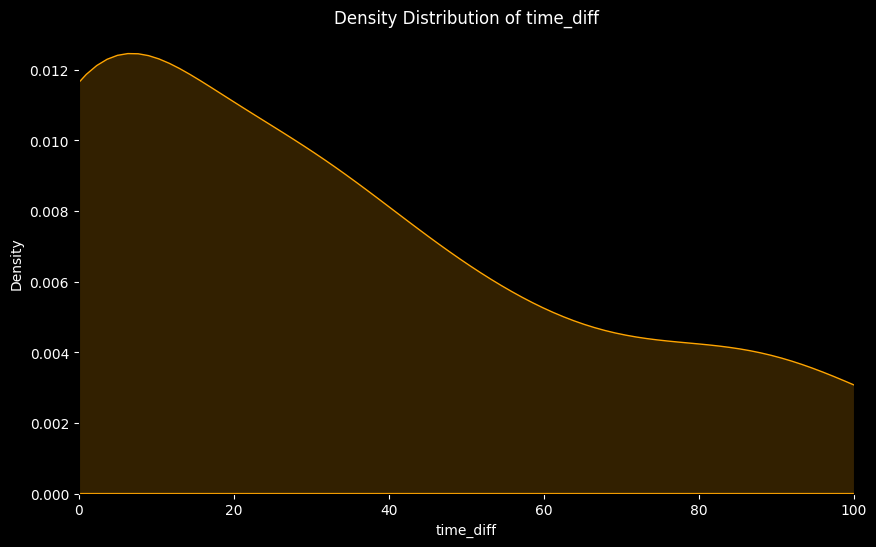

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 밀도 분포 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(AR_SMG['shot'], color='orange', fill=True, alpha=0.2, label='time_diff')
# sns.kdeplot(SDMR_parts['time_diff_min'], color='blue', fill=True, alpha=0.2, label='time_diff')

# plt.axvline(w_SDMR_parts, color='green', linestyle='dashed', linewidth=1, label='wak')
# plt.axvline(w_AR_parts, color='blue', linestyle='dashed', linewidth=1, label='wak')

# 축 및 레이블 설정
plt.xlabel('time_diff', color='white')
plt.ylabel('Density', color='white')
plt.title('Density Distribution of time_diff', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# X축 범위 설정
plt.xlim(0, 100)
# plt.xticks(np.arange(0, 3.5, 0.5))  # 0.5초 간격으로 x축 눈금 설정

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# 그래프 표시
# plt.grid(True)
plt.show()

## Bluezone Luck

In [17]:
# bluzon 운 측정을 위한 로그
log_df['_D'] = pd.to_datetime(log_df['_D'])

def safetyzone_df(df):
    col = ['matchId','MapName','_D','_T', 'character.name' , 'character.location.x', 'character.location.y', 'character.location.z' ,'character.isInBlueZone', 'character.zone', 'elapsedTime',
          'gameState.safetyZonePosition.x', 'gameState.safetyZonePosition.y', 'gameState.safetyZoneRadius',
            'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victim.isInBlueZone', # 피해를 받은 유저
            'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance','dBNOMaker.isInBlueZone', # 기절을 만든 유저
            'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
            'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance', 'killer.isInBlueZone']

    bluezone_df = df[df['_T'].isin(['LogPlayerKillV2','LogPlayerPosition','LogGameStatePeriodic'])][col]


    zone_df = df[(df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[['_T','_D','matchId','MapName','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZoneRadius']]

    zone_df['_D'] = pd.to_datetime(zone_df['_D'])
    zone_df = zone_df.groupby(['matchId','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y','gameState.safetyZoneRadius']).agg(
        _D = pd.NamedAgg(column='_D',aggfunc = 'max'), # 다음 자기장이 정해지는 시간
        count = pd.NamedAgg(column='gameState.safetyZoneRadius',aggfunc='count'),
        during_time = pd.NamedAgg(column='_D',aggfunc=lambda x: x.diff().dt.total_seconds().sum()) # 세이프티존이 유지되는 시간, 100 이라면 100초 이후에 다음 자기장이 정해진것
        ).reset_index().sort_values(by=['matchId','gameState.safetyZoneRadius'],ascending=False)


    zone_df = zone_df[zone_df['count']> 3].reset_index()
    zone_df['page'] = zone_df.groupby('matchId')['gameState.safetyZoneRadius'].rank(method='dense', ascending=False).astype('int')

    zone_df['next_SafetyZoneRadius'] = zone_df.groupby('matchId')['gameState.safetyZoneRadius'].shift(-1)
    zone_df['next_SafetyZone.x'] = zone_df.groupby('matchId')['gameState.safetyZonePosition.x'].shift(-1)
    zone_df['next_SafetyZone.y'] = zone_df.groupby('matchId')['gameState.safetyZonePosition.y'].shift(-1)

    zone_df = zone_df[['matchId','_D','gameState.safetyZoneRadius','page','next_SafetyZoneRadius','next_SafetyZone.x','next_SafetyZone.y']]


    return zone_df



zone_df = safetyzone_df(log_df)


In [ ]:
zone_df.head()

,matchId,_D,gameState.safetyZoneRadius,page,next_SafetyZoneRadius,next_SafetyZone.x,next_SafetyZone.y
0,d09e1aad-2e81-4766-8359-2782509a5e6e,2024-07-10 13:42:21.279000+00:00,221374.671875,1,106259.843750,150483.578125,110542.187500
1,d09e1aad-2e81-4766-8359-2782509a5e6e,2024-07-10 13:48:21.276000+00:00,106259.843750,2,69068.898438,169223.390625,86630.242188
2,d09e1aad-2e81-4766-8359-2782509a5e6e,2024-07-10 13:51:51.276000+00:00,69068.898438,3,37987.894531,150716.578125,89634.960938
3,d09e1aad-2e81-4766-8359-2782509a5e6e,2024-07-10 13:54:21.274000+00:00,37987.894531,4,18993.947266,141030.546875,90646.406250
4,d09e1aad-2e81-4766-8359-2782509a5e6e,2024-07-10 13:56:51.272000+00:00,18993.947266,5,9496.973633,136531.000000,90332.515625


In [ ]:
merged_2['playerName'].unique()

100

In [18]:
position_col = ['matchId','MapName','_D','_T', 'character.name' , 'character.location.x', 'character.location.y', 'character.location.z' , 'elapsedTime']
bluzone_col = ['gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZoneRadius']

# player_position = log_df[(log_df['_T'] == 'LogPlayerPosition') & (log_df['character.name'] == 'wakgood') | (log_df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[position_col + bluzone_col]
# player_position['_D'] = pd.to_datetime(player_position['_D'])
# test = pd.merge(player_position, zone_df,on=['matchId','_D','gameState.safetyZoneRadius'],how='left')


# 모든 고유한 character.name 추출
character_names = merged_2['playerName'].unique()

# 각 character.name 별로 병합 수행
merged_results = []

for name in character_names:
    # 특정 character.name에 대한 데이터만 선택
    player_position = log_df[(log_df['_T'] == 'LogPlayerPosition') & (log_df['character.name'] == name) | (log_df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[position_col + bluzone_col]
    merge = pd.merge(player_position, zone_df, on=['matchId','_D','gameState.safetyZoneRadius'],how='left')
    # 결과 저장
    merged_results.append(merge)

# 결과들을 하나의 데이터프레임으로 병합
test = pd.concat(merged_results, ignore_index=True)

In [19]:
col_list = ['matchId','MapName','_D','character.name',
'lag.character.location.x',
'lag.character.location.y',
'lag.character.location.z',
'page',
'next_SafetyZoneRadius','next_SafetyZone.x','next_SafetyZone.y']


test['lag.character.location.x'] = test.groupby(['matchId'])['character.location.x'].shift(1)
test['lag.character.location.y'] = test.groupby(['matchId'])['character.location.y'].shift(1)
test['lag.character.location.z'] = test.groupby(['matchId'])['character.location.z'].shift(1)
test['character.name'] = test.groupby(['matchId'])['character.name'].shift(1)


In [20]:
position = test[test['page'] >= 0][col_list]

In [21]:
# 각 블루존에 대해 캐릭터가 블루존 안에 있는지 여부 계산
is_in_bluezone = []

for index, row in position.iterrows():
    character_x = row['lag.character.location.x']  # 'next_SafetyZoneRadius','next_SafetyZone.x','next_SafetyZone.y'
    character_y = row['lag.character.location.y']
    bluezone_x = row['next_SafetyZone.x']
    bluezone_y = row['next_SafetyZone.y']
    bluezone_radius = row['next_SafetyZoneRadius']

    # 캐릭터와 블루존 중심 간의 거리 계산
    distance_to_center = np.sqrt((bluezone_x - character_x)**2 + (bluezone_y - character_y)**2)

    # 블루존 안에 있는지 여부 확인
    if distance_to_center <= bluezone_radius:
        is_in_bluezone.append(True)
    else:
        is_in_bluezone.append(False)

# 결과 출력
position['is_in_zone'] = is_in_bluezone


In [22]:
position[['matchId','MapName','character.name','page','next_SafetyZone.x','next_SafetyZone.y','next_SafetyZoneRadius','lag.character.location.x','lag.character.location.y','is_in_zone']]#[:5].reset_index()
position['character.name'] = position.groupby('matchId')['character.name'].transform(lambda x: x.ffill().bfill())


In [23]:
# 다음자기장이 없는 경우 (게임끝)
fianl_bluzone_df = position.dropna(subset=['next_SafetyZone.x','next_SafetyZone.y',	'next_SafetyZoneRadius'])

In [24]:
import numpy as np

def min_distance_to_circle(next_SafetyZone_x, next_SafetyZone_y, next_SafetyZoneRadius, lag_character_location_x, lag_character_location_y):

    distance_to_center = np.sqrt((next_SafetyZone_x - lag_character_location_x)**2 + (next_SafetyZone_y - lag_character_location_y)**2)

    # Calculate the minimum distance to enter the circle's area
    min_distance = (distance_to_center - next_SafetyZoneRadius)/100

    # Return the minimum distance (maximum of 0 and min_distance to ensure non-negative return value)
    return max(0, min_distance)


def distance_to_circle_middle(next_SafetyZone_x, next_SafetyZone_y, next_SafetyZoneRadius, lag_character_location_x, lag_character_location_y):
    distance_to_center = np.sqrt((next_SafetyZone_x - lag_character_location_x)**2 +
                                (next_SafetyZone_y - lag_character_location_y)**2) /100
    return distance_to_center

fianl_bluzone_df['distance'] = fianl_bluzone_df.apply(lambda row: distance_to_circle_middle(row['next_SafetyZone.x'], row['next_SafetyZone.y'], row['next_SafetyZoneRadius'], row['lag.character.location.x'], row['lag.character.location.y']), axis=1)


<ipython-input-24-2c105685b43e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fianl_bluzone_df['distance'] = fianl_bluzone_df.apply(lambda row: distance_to_circle_middle(row['next_SafetyZone.x'], row['next_SafetyZone.y'], row['next_SafetyZoneRadius'], row['lag.character.location.x'], row['lag.character.location.y']), axis=1)


In [ ]:
final_bluzone_df

In [25]:
# 첫번째 Safety존 중심, 유저별 거리차이

bluezone_phase_1  =fianl_bluzone_df[fianl_bluzone_df['page'] == 1].groupby(['character.name']).agg(
    isin = pd.NamedAgg(column='is_in_zone',aggfunc='sum'),
    distance_mean = pd.NamedAgg(column='distance',aggfunc='mean'),
).sort_values(by=['distance_mean'],ascending=False).reset_index()
bluezone_phase_1.rename(columns={'character.name': 'playerName'}, inplace=True)


In [26]:
merged_4 = pd.merge(merged_3, bluezone_phase_1, on='playerName', how='left')

In [32]:
data = merged_4[['playerName','timeSurvived','farming_speed','AR_SMG_dmg','SR_DMR_dmg','distance_mean']]
data.sort_values(by=['playerName'],ascending=True)

,playerName,timeSurvived,farming_speed,AR_SMG_dmg,SR_DMR_dmg,distance_mean
30,ATK_Speed,648.571429,0.529676,54,414.000000,2712.013431
64,AmadeusChoi,475.000000,0.542765,0,480.000000,2534.672384
84,BEITER_,715.571429,0.657485,96,0.000000,2221.045536
97,BJHighTension,390.142857,1.041357,0,0.000000,2545.453073
76,B_ver_,733.857143,0.501120,181,186.000000,2198.503189
44,BisnizKim,540.857143,0.574169,648,110.000000,2765.972399
34,Bujungingan,667.714286,0.740953,656,140.000000,1451.450549
39,BusinessKim,845.142857,0.654702,496,238.000000,1922.182630
71,ButterusIII,632.857143,0.654533,72,62.000000,1390.302753
74,CEO_colt,683.714286,0.487333,121,63.000000,1656.112355


## 테이블 정규화
* min max 이용

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = merged_4[['playerName','timeSurvived','farming_speed','AR_SMG_dmg','SR_DMR_dmg','distance_mean']]

min_max_scaler = MinMaxScaler()

# 선택한 컬럼만 정규화
columns_to_normalize = ['timeSurvived', 'farming_speed', 'AR_SMG_dmg', 'SR_DMR_dmg', 'distance_mean']
data[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

# 파밍속도와 자기장과의 거리는 작을 수록 좋은것
data['farming_speed'] = 1 - data['farming_speed']
data['distance_mean'] = 1 - data['distance_mean']

pd.set_option('display.float_format', '{:.6f}'.format)

data.sort_values(by=['playerName'],ascending=True)

<ipython-input-33-6e2a70269124>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])
<ipython-input-33-6e2a70269124>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['farming_speed'] = 1 - data['farming_speed']
<ipython-input-33-6e2a70269124>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,playerName,timeSurvived,farming_speed,AR_SMG_dmg,SR_DMR_dmg,distance_mean
30,ATK_Speed,0.363535,0.641846,0.024281,0.453947,0.200383
64,AmadeusChoi,0.137488,0.627440,0.000000,0.526316,0.307672
84,BEITER_,0.450791,0.501185,0.043165,0.000000,0.497412
97,BJHighTension,0.026977,0.078715,0.000000,0.000000,0.301150
76,B_ver_,0.474605,0.673273,0.081385,0.203947,0.511050
44,BisnizKim,0.223256,0.592878,0.291367,0.120614,0.167739
34,Bujungingan,0.388465,0.409324,0.294964,0.153509,0.963006
39,BusinessKim,0.619535,0.504248,0.223022,0.260965,0.678220
71,ButterusIII,0.343070,0.504434,0.032374,0.067982,1.000000
74,CEO_colt,0.409302,0.688446,0.054406,0.069079,0.839189


In [ ]:
# 'playerName'을 인덱스로 설정
data = data.set_index('playerName')

# 데이터프레임을 transpose하여 피벗 테이블 형식으로 변환
pivot_df = data.T
pivot_df

playerName,realchunshik,WAK_RED,Reft_Light_Degal,KareBob,Katsuragi_8,Jyonaen_SUDAMAN,DOOSEVEN,kreaze_,cookiking9,ChunYang,pi_caon,wakgood,hadiaaa,KKaMaGui_,CallyCarlyDavids,GreatMoonAroma,KimKamen,Cliplight_,roentgenium111,Dandap_Bug,Wild_Horse_wwg,number198,JUNINHO1,c_chuno,YangDoki,Real_Dr_Dopamine,Wakpago,ZONE_JINHO,NOLLAN,PungsinTheWizard,ATK_Speed,LeeDukSooHalabye,diejinhe,canindaeyo,Bujungingan,MADAOM_M,Poronpo,Hiki_King,LOVE_JenToo,BusinessKim,HANGYEOL8008,soosemi432,HickMin,yimdoking01,BisnizKim,ISD-GOSEGU,ISD-VIichan,Too_Cats,sellkey_2,MEKAMAENGGISAN,cocomizzan,CLOVER_v7,Gyu7__,Ohgrim,MILKLARGE,GlLbert,deathhammer_loky,VLYZ-MOONMOMO,RainSignac,Ma-Wang,StarTree,SkipAndCall,RUSUK_,Jegal_Tong,AmadeusChoi,KwonMin98,nokcho999,Ice_KKeKKi,ggumteul,KILJAY,arcfactory,ButterusIII,ming-turn,jegal_geumja,CEO_colt,Victory_W_,B_ver_,Solongos747,HaeseongPark,mygomiee,wwg_Charlotte,DACK-BAL,Imzecheon,Captain_Sullivan,BEITER_,shandyHan,gamjeonwang,Nostradam_Hood,Secretgirl_486,Dotdot__,dogcat_0926,Yu_Na_Gi,YEORUMI_030,Phalaenopsis_HJR,Wak_seyong,jaesu111,merubo999,BJHighTension,Mr_Blanks,Shaby_1
timeSurvived,0.711070,0.816372,0.706977,1.000000,0.627349,0.578419,0.645023,0.741023,0.749953,0.593302,0.774326,0.520000,0.632744,0.851349,0.371163,0.493209,0.430698,0.509581,0.602419,0.397209,0.570047,0.384186,0.538419,0.687070,0.612465,0.524279,0.638326,0.302140,0.456186,0.287256,0.363535,0.285209,0.476465,0.380651,0.388465,0.190884,0.388837,0.582698,0.317767,0.619535,0.556093,0.465116,0.309209,0.382140,0.223256,0.697116,0.440186,0.292651,0.331907,0.206884,0.569674,0.150884,0.393116,0.427349,0.474791,0.255628,0.591070,0.640930,0.510326,0.114605,0.425488,0.333209,0.179907,0.377488,0.137488,0.406326,0.274233,0.291907,0.420093,0.282605,0.393860,0.343070,0.361674,0.130791,0.409302,0.562047,0.474605,0.280000,0.582512,0.273302,0.156837,0.344744,0.246140,0.238140,0.450791,0.464000,0.271442,0.154791,0.184930,0.000000,0.462884,0.120558,0.107721,0.192930,0.185488,0.078512,0.322791,0.026977,0.253209,0.080372
farming_speed,1.000000,0.825705,0.461765,0.662921,0.667451,0.930632,0.542783,0.995412,0.793065,0.726699,0.826714,0.390789,0.329681,0.421329,0.824215,0.971466,0.492753,0.924330,0.493047,0.220038,0.588459,0.314555,0.600449,0.560309,0.614580,0.486772,0.651017,0.532573,0.588094,0.583510,0.641846,0.812888,0.590689,0.484337,0.409324,0.775120,0.692075,0.448175,0.581017,0.504248,0.702030,0.721748,0.600972,0.527080,0.592878,0.434559,0.792422,0.643928,0.532415,0.590401,0.748322,0.477782,0.714642,0.510718,0.687516,0.398163,0.325923,0.451719,0.538710,0.611263,0.644958,0.620832,0.301388,0.195980,0.627440,0.424356,0.475131,0.428043,0.659240,0.408511,0.500220,0.504434,0.544891,0.414795,0.688446,0.146676,0.673273,0.503486,0.473410,0.450792,0.328911,0.451644,0.401433,0.617332,0.501185,0.590619,0.714374,0.382802,0.255196,0.302571,0.506979,0.581654,0.397334,0.158925,0.573711,0.590660,0.428578,0.078715,0.000000,0.312132
AR_SMG_dmg,0.860162,1.000000,0.725719,0.663669,0.477068,0.687950,0.629496,0.339928,0.354766,0.567896,0.188849,0.440647,0.343076,0.346673,0.346673,0.310252,0.517086,0.297212,0.300809,0.297662,0.126799,0.415917,0.328687,0.294514,0.399730,0.254946,0.345324,0.359263,0.259892,0.316097,0.024281,0.215827,0.247302,0.405576,0.294964,0.162320,0.142536,0.364209,0.205036,0.223022,0.151529,0.182554,0.263489,0.099371,0.291367,0.195594,0.273381,0.229766,0.161421,0.232014,0.092176,0.161871,0.160971,0.228417,0.165018,0.214029,0.123651,0.253147,0.200989,0.171313,0.026978,0.231115,0.157824,0.173112,0.000000,0.224371,0.138489,0.153327,0.148831,0.170863,0.133543,0.032374,0.172212,0.159173,0.054406,0.000000,0.081385,0.161421,0.158273,0.042716,0.118255,0.113759,0.095324,0.110162,0.043165,0.088579,0.000000,0.033273,0.000450,0.026978,0.037320,0.018885,0.026079,0.023381,0.000000,0.000000,0.007644,0.000000,0.000000,0.000000
SR_DMR_dmg,0.588816,0.240132,0.495614,0.567982,0.785088,0.254386,0.201754,1.000000,0.655702,0.112939,0.801535,0.410088,0.236842,0.039474,0.437500,0.330044,0.

## Weapon Parts Luck

## SR,DMR 중장거리 지표
* 난사가 불가능한 (특히, SR같은 경우) 무기가 있으므로 AR과 다른 조건으로 봐야한다.
